In [1]:
import numpy as np
import nengo
from nengo.utils.ensemble import tuning_curves
import matplotlib
import matplotlib.pyplot as plt
from nengo.processes import Piecewise

In [2]:
def simulate_dynamics(
        stim, feedback, T=1.0, dt=1e-3, tau=100e-3):
    with nengo.Network(seed=581) as model:
        nd_stim = nengo.Node(stim)

        ens_x = nengo.Ensemble(
            n_neurons=100, dimensions=1)

        nengo.Connection(nd_stim, ens_x, synapse=tau)
        nengo.Connection(ens_x, ens_x, function=feedback, synapse=tau)

        p_stim = nengo.Probe(nd_stim)
        p_x = nengo.Probe(ens_x, synapse=10e-3)

    with nengo.Simulator(model, dt=dt, progress_bar=None) as sim:
        sim.run(T)

    return \
        sim.trange(), \
        sim.data[p_stim], \
        sim.data[p_x]

In [3]:
def plot_dynamics(ts, us, xs, ax=None, show_legend=True, show_input=True, range_=1.75, label='State $x(t)$', zorder=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(3.5, 3))
    else:
        fig = ax.get_figure()

    if show_input:
        ax.plot(ts, us, 'k--', label='Input $u(t)$')
    ax.plot(ts, xs, label=label, zorder=zorder)
    if show_legend:
        ax.legend(
            ncol=1,
            handlelength=2.0,
            handletextpad=0.25,
            labelspacing=0.1,
            columnspacing=0.75
        )
    ax.set_xlabel('Time $t$ (s)')
    if isinstance(range_, tuple):
        ax.set_ylim(*range_)
    else:
        ax.set_ylim(-range_, range_)

    return fig, ax

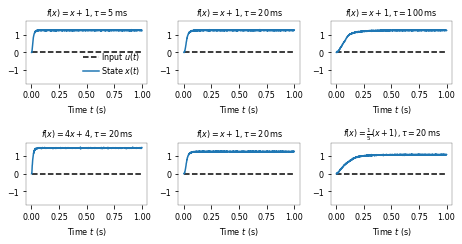

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(6.5, 3.5))

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: 0.0,
    lambda x: x + 1,
    tau=5e-3,
), ax=axs[0, 0])
ax.set_title("$f(x) = x + 1, \\tau = 5\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: 0.0,
    lambda x: x + 1,
    tau=20e-3,
), ax=axs[0, 1], show_legend=False)
ax.set_title("$f(x) = x + 1, \\tau = 20\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: 0.0,
    lambda x: x + 1,
), ax=axs[0, 2], show_legend=False)
ax.set_title("$f(x) = x + 1, \\tau = 100\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: 0.0,
    lambda x: 4 * (x + 1),
    tau=5e-3,
), ax=axs[1, 0], show_legend=False)
ax.set_title("$f(x) = 4x + 4, \\tau = 20\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: 0.0,
    lambda x: x + 1,
    tau=20e-3,
), ax=axs[1, 1], show_legend=False)
ax.set_title("$f(x) = x + 1, \\tau = 20\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: 0.0,
    lambda x: 0.2 * x + 1,
), ax=axs[1, 2], show_legend=False)
ax.set_title("$f(x) = \\frac{1}{5}(x + 1), \\tau = 20\,\\mathrm{ms}$");


fig.tight_layout()
fig.savefig('../fxp1_example.pdf', bbox_inches='tight', transparent=True)

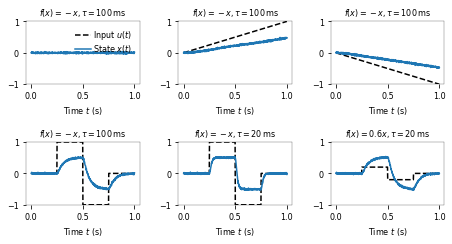

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(6.5, 3.5))
_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: 0.0,
    lambda x: -x,
), ax=axs[0, 0], range_=1.0)
ax.set_title("$f(x) = -x, \\tau = 100\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: t,
    lambda x: -x,
), ax=axs[0, 1], show_legend=False, range_=1.0)
ax.set_title("$f(x) = -x, \\tau = 100\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: -t,
    lambda x: -x,
), ax=axs[0, 2], show_legend=False, range_=1.0)
ax.set_title("$f(x) = -x, \\tau = 100\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    Piecewise({
        0.25: 1.0,
        0.5: -1.0,
        0.75: 0.0,
    }),
    lambda x: -x,
), ax=axs[1, 0], show_legend=False, range_=1.0)
ax.set_title("$f(x) = -x, \\tau = 100\,\\mathrm{ms}$");


_, ax = plot_dynamics(*simulate_dynamics(
    Piecewise({
        0.25: 1.0,
        0.5: -1.0,
        0.75: 0.0,
    }),
    lambda x: -x,
    tau=0.02,
), ax=axs[1, 1], show_legend=False, range_=1.0)
ax.set_title("$f(x) = -x, \\tau = 20\,\\mathrm{ms}$");


_, ax = plot_dynamics(*simulate_dynamics(
    Piecewise({
        0.25: 0.2,
        0.5: -0.2,
        0.75: 0.0,
    }),
    lambda x: 0.6 * x,
    tau=0.02,
), ax=axs[1, 2], show_legend=False, range_=1.0)
ax.set_title("$f(x) = 0.6 x, \\tau = 20\,\\mathrm{ms}$");


fig.tight_layout()
fig.savefig('../fmx_example.pdf', bbox_inches='tight', transparent=True)

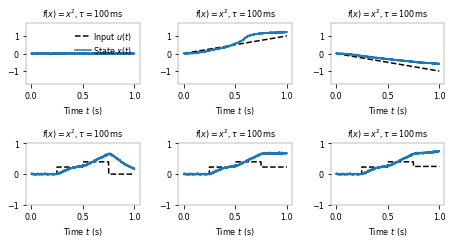

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(6.5, 3.5))
_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: 0.0,
    lambda x: x**2,
    tau=0.1,
), ax=axs[0, 0])
ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: t,
    lambda x: x**2,
    tau=0.1,
), ax=axs[0, 1], show_legend=False)
ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    lambda t: -t,
    lambda x: x**2,
    tau=0.1,
), ax=axs[0, 2], show_legend=False)
ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    Piecewise({
        0.25: 0.23,
        0.5: 0.4,
        0.75: 0
    }),
    lambda x: x**2,
    tau=0.1,
), ax=axs[1, 0], show_legend=False, range_=1)
ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");

_, ax = plot_dynamics(*simulate_dynamics(
    Piecewise({
        0.25: 0.23,
        0.5: 0.4,
        0.75: 0.23,
    }),
    lambda x: x**2,
    tau=0.1,
    T=1.0,
), ax=axs[1, 1], show_legend=False, range_=1)
ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");


_, ax = plot_dynamics(*simulate_dynamics(
    Piecewise({
        0.25: 0.23,
        0.5: 0.4,
        0.75: 0.25,
    }),
    lambda x: x**2,
    tau=0.1,
    T=1.0,
), ax=axs[1, 2], show_legend=False, range_=1)
ax.set_title("$f(x) = x^2, \\tau = 100\,\\mathrm{ms}$");


fig.tight_layout()
fig.savefig('../fxs_example.pdf', bbox_inches='tight', transparent=True)

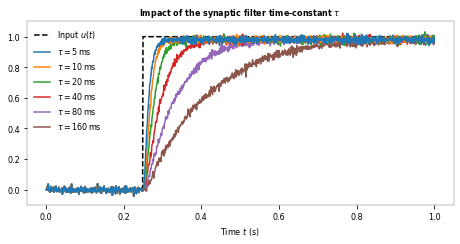

In [7]:
fig, ax = plt.subplots(figsize=(6.5, 3.5))
for i, tau in enumerate([5, 10, 20, 40, 80, 160]):
    plot_dynamics(*simulate_dynamics(
        Piecewise({
            0.25: 1.0,
        }),
        lambda x: 0,
        tau=tau * 1e-3,
    ), ax=ax,
       show_legend=False,
       show_input=i==0,
       range_=(-0.1, 1.1),
       zorder=100-i,
       label="$\\tau = {}\\,\\mathrm{{ms}}$".format(tau))
ax.legend()
ax.set_title('Impact of the synaptic filter time-constant $\\tau$')

fig.tight_layout()
fig.savefig('../synaptic_filter.pdf', bbox_inches='tight', transparent=True)